In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

In [2]:
sdss_df = pd.read_csv('data.csv', skiprows=0)

In [3]:
sdss_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237680e+18,318.951692,9.315146,19.51665,18.50036,17.95667,17.53139,17.32035,7777,301,5,53,8.196580e+17,GALAXY,0.114299,728,52520,10
1,1.237670e+18,217.940002,14.608378,19.13548,18.55482,17.95603,17.68272,17.63717,5322,301,3,56,6.154250e+18,QSO,1.802680,5466,56033,304
2,1.237660e+18,129.948221,25.213328,19.54955,18.19434,17.83220,17.51329,17.47054,4335,301,3,130,2.173030e+18,GALAXY,0.070813,1930,53347,175
3,1.237650e+18,160.357788,3.567886,17.72343,16.65830,16.23667,16.07098,16.02797,2126,301,1,275,6.496480e+17,STAR,0.000570,577,52367,13
4,1.237660e+18,226.001700,38.619699,16.60500,15.66234,15.39406,15.29443,15.29302,3699,301,2,227,5.817650e+18,STAR,-0.000184,5167,56066,454


In [4]:
sdss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 18 columns):
objid        9998 non-null float64
ra           9998 non-null float64
dec          9998 non-null float64
u            9998 non-null float64
g            9998 non-null float64
r            9998 non-null float64
i            9998 non-null float64
z            9998 non-null float64
run          9998 non-null int64
rerun        9998 non-null int64
camcol       9998 non-null int64
field        9998 non-null int64
specobjid    9998 non-null float64
class        9998 non-null object
redshift     9998 non-null float64
plate        9998 non-null int64
mjd          9998 non-null int64
fiberid      9998 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
sdss_df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,9.998000e+03,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.0,9998.000000,9998.000000,9.998000e+03,9998.000000,9998.000000,9998.000000,9998.000000
mean,1.237662e+18,179.122254,24.117965,18.640799,17.421133,16.905773,16.654447,16.502960,3977.065213,301.0,3.546109,191.064913,2.986349e+18,0.172984,2652.323065,53949.066713,358.427185
std,7.992930e+12,83.918589,20.121962,0.828646,0.981766,1.139697,1.213347,1.304838,1688.999836,0.0,1.582459,148.868036,2.572420e+18,0.451032,2284.753836,1573.673734,217.128529
min,1.237650e+18,0.072425,-16.867118,10.996230,10.511390,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995190e+17,-0.003808,266.000000,51608.000000,1.000000
25%,1.237660e+18,131.837906,4.940035,18.210973,16.861110,16.212167,15.889470,15.643012,2830.000000,301.0,2.000000,85.000000,1.320715e+18,-0.000027,1173.000000,52734.250000,177.000000
50%,1.237660e+18,184.422091,23.773575,18.878195,17.519205,16.907610,16.612855,16.446770,3919.000000,301.0,4.000000,154.000000,2.394820e+18,0.040061,2127.000000,53762.000000,355.000000
75%,1.237670e+18,231.322095,39.591304,19.273183,18.054603,17.598655,17.376127,17.274305,5061.000000,301.0,5.000000,250.000000,3.310188e+18,0.093719,2940.000000,54629.000000,514.000000
max,1.237680e+18,359.999615,82.656319,19.599790,19.906420,29.571860,30.163590,29.383740,8158.000000,301.0,6.000000,977.000000,1.311790e+19,6.517635,11651.000000,58526.000000,1000.000000


In [6]:
sdss_df['class'].value_counts()

GALAXY    4857
STAR      4056
QSO       1085
Name: class, dtype: int64

In [7]:
sdss_df.columns.values

array(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun',
       'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'], dtype=object)

In [8]:
sdss_df.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)
sdss_df.head(1)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,318.951692,9.315146,19.51665,18.50036,17.95667,17.53139,17.32035,GALAXY,0.114299,728,52520,10


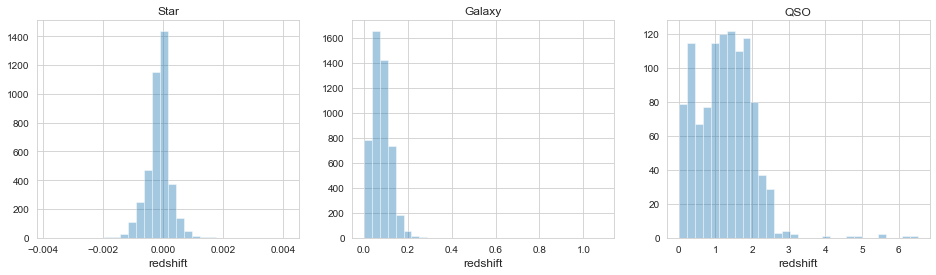

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(sdss_df[sdss_df['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_df[sdss_df['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_df[sdss_df['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('QSO')

C:\Users\AFA\miniconda3\envs\jcopdl\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


Text(0.5, 1.0, 'dec')

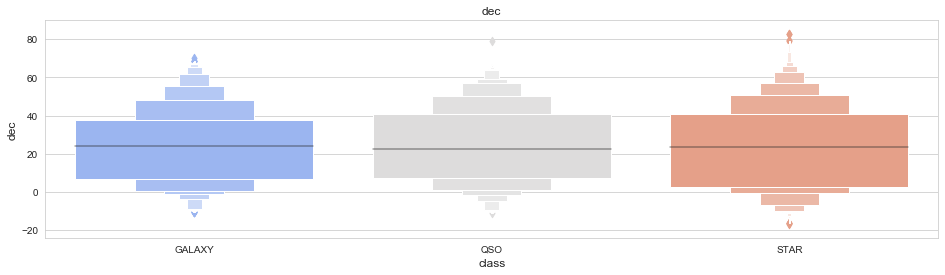

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 4))
ax = sns.lvplot(x=sdss_df['class'], y=sdss_df['dec'], palette='coolwarm')
ax.set_title('dec')

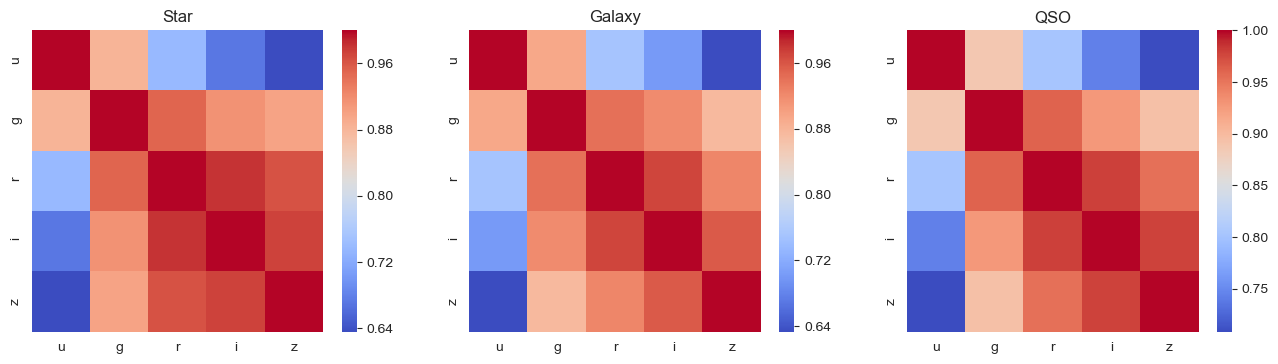

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(sdss_df[sdss_df['class']=='STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Star')
ax = sns.heatmap(sdss_df[sdss_df['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Galaxy')
ax = sns.heatmap(sdss_df[sdss_df['class']=='QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap='coolwarm')
ax = ax.set_title('QSO')

C:\Users\AFA\miniconda3\envs\jcopdl\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Equatorial coordinates')

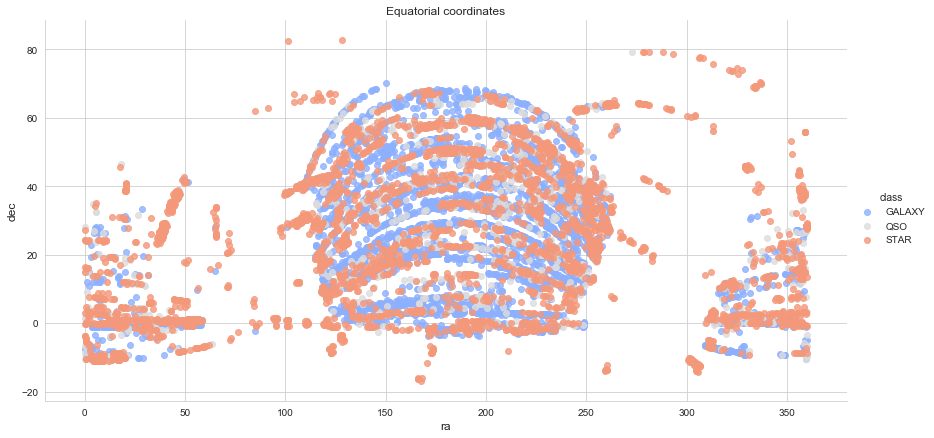

In [12]:
sns.lmplot(x='ra', y='dec', data=sdss_df, hue='class', fit_reg=False, palette='coolwarm', size=6, aspect=2)
plt.title('Equatorial coordinates')

In [13]:
sdss_df_fe = sdss_df

# encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(sdss_df_fe['class'])
sdss_df_fe['class'] = y_encoded

# Principal Component Analysis
pca = PCA(n_components=3)
ugriz = pca.fit_transform(sdss_df_fe[['u', 'g', 'r', 'i', 'z']])

# update dataframe 
sdss_df_fe = pd.concat((sdss_df_fe, pd.DataFrame(ugriz)), axis=1)
sdss_df_fe.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
sdss_df_fe.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)
sdss_df_fe.head()

,ra,dec,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,318.951692,9.315146,0,0.114299,728,52520,10,2.040666,-0.532123,-0.119189
1,217.940002,14.608378,1,1.802680,5466,56033,304,2.213847,-0.076968,-0.051734
2,129.948221,25.213328,0,0.070813,1930,53347,175,1.937776,-0.405284,0.107994
3,160.357788,3.567886,2,0.000570,577,52367,13,-1.408037,0.672906,0.019175
4,226.001700,38.619699,2,-0.000184,5167,56066,454,-3.280838,1.438459,-0.027978


In [14]:
scaler = MinMaxScaler()
sdss = scaler.fit_transform(sdss_df_fe.drop('class', axis=1))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(sdss, sdss_df_fe['class'], test_size=0.33)

# KNN

In [16]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 87.91
Time consumed for training: 0.079 seconds
Time consumed for prediction: 0.27465 seconds


# Naive Bayes

In [17]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(sdss_df_fe.drop('class', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, sdss_df_fe['class'], test_size=0.33)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 98.27
Time consumed for training: 0.054 seconds
Time consumed for prediction: 0.00117 seconds


# XGBoost

In [18]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 99.30
Time consumed for training: 1.767
Time consumed for prediction: 0.02073 seconds


# Random Forest

In [19]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 98.91
Time consumed for training: 0.514 seconds
Time consumed for prediction: 0.04278 seconds


# SVM

In [20]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 90.79
Time consumed for training: 0.952 seconds
Time consumed for prediction: 0.27397 seconds


# Compare

In [21]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
XGBoost,99.303030,1.766780,0.020733
Random Forest,98.909091,0.514340,0.042784
Naive Bayes,98.272727,0.053625,0.001168
SVC,90.787879,0.952336,0.273966
KNN,87.909091,0.078653,0.274646


# Kfold Validation

## Random Forest

In [22]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.98358209 0.98507463 0.99552239 0.99104478 0.98208955 0.98208955
 0.98059701 0.98507463 0.99103139 0.98505232]
Mean: 0.9861158333891081
Standard Deviation: 0.004577541147677733


## XGBoost

In [23]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.98507463 0.99104478 0.99552239 0.99253731 0.98955224 0.99104478
 0.98208955 0.98656716 0.9955157  0.98804185]
Mean: 0.9896990384400866
Standard Deviation: 0.0041387030686928054


In [24]:
importances = pd.DataFrame({
    'Feature': sdss_df_fe.drop('class', axis=1).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
redshift,0.395054
PCA_3,0.167406
PCA_2,0.123018
PCA_1,0.076094
fiberid,0.067850
dec,0.058339
ra,0.055802
mjd,0.032340
plate,0.024096


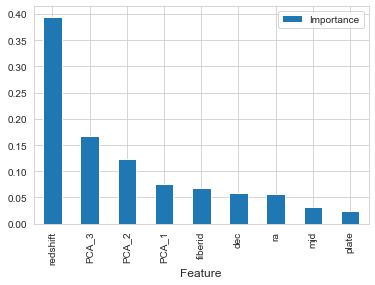

In [25]:
importances.plot.bar()

In [27]:
scaler = MinMaxScaler()
sdss = pd.DataFrame(scaler.fit_transform(sdss_df_fe.drop(['mjd', 'class'], axis=1)), columns=sdss_df_fe.drop(['mjd', 'class'], axis=1).columns)
sdss['class'] = sdss_df_fe['class']

In [28]:
sdss.head()

,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3,class
0,0.885955,0.263076,0.018111,0.040580,0.009009,0.559418,0.190960,0.434917,0
1,0.605310,0.316262,0.277007,0.456741,0.303303,0.565255,0.237753,0.438895,1
2,0.360839,0.422819,0.011442,0.146157,0.174174,0.555949,0.204000,0.448313,0
3,0.445327,0.205329,0.000671,0.027317,0.012012,0.443165,0.314846,0.443076,2
4,0.627708,0.557525,0.000556,0.430479,0.453453,0.380035,0.393551,0.440295,2


In [29]:
sdss.to_csv('sdss_data.csv')

# Testing XGBoost Hyperparameter

In [30]:
X_train, X_test, y_train, y_test = train_test_split(sdss.drop('class', axis=1), sdss['class'],
                                                   test_size=0.33)

In [31]:
xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy WITH optimal hyperparameters is: 98.85


In [32]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.98955224 0.99701493 0.9880597  0.99253731 0.98955224 0.99253731
 0.99253731 0.9880597  0.98505232 0.99850523]
Mean: 0.9913408294848628
Standard Deviation: 0.003940734072332523


# XGBoost Evaluation

In [33]:
unique, counts = np.unique(sdss['class'], return_counts=True)
dict(zip(unique, counts))

{0: 4857, 1: 1085, 2: 4056}

In [34]:
predictions = cross_val_predict(xgb, sdss.drop('class', axis=1), sdss['class'], cv=3)
confusion_matrix(sdss['class'], predictions)

array([[4825,   23,    9],
       [  56, 1028,    1],
       [   4,    0, 4052]], dtype=int64)

In [35]:
print("Precision:", precision_score(sdss['class'], predictions, average='micro'))
print("Recall:",recall_score(sdss['class'], predictions, average='micro'))

Precision: 0.9906981396279256
Recall: 0.9906981396279256


In [36]:
print("F1-Score:", f1_score(sdss['class'], predictions, average='micro'))

F1-Score: 0.9906981396279256
